# Gaze-based Autism Detection Using Videos

### Importing libraries

In [ ]:
#Feel free to add any libraries you need to here
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
%matplotlib inline

Upload feat.zip into colab. you can find the icon to upload stuff towards your left. feat.zip is provided to you already with your assignment .ipynb notebook.

In [ ]:
!unzip /content/feat.zip

unzip:  cannot find or open /content/feat.zip, /content/feat.zip.zip or /content/feat.zip.ZIP.


## Loads the sensor data from numpy files
### Ideally you do not need to change anything here

In [ ]:
def load_data_autistic():
	test_X_1= np.load('feat//vid_1_gaze_test_X.npy')
	test_Y_1= np.load('feat//vid_1_gaze_test_Y.npy')
	test_X_2= np.load('feat//vid_2_gaze_test_X.npy')
	test_Y_2= np.load('feat//vid_2_gaze_test_Y.npy')
	test_points_X = np.concatenate((test_X_1,test_X_2),1)
	test_points_Y = np.concatenate((test_Y_1,test_Y_2),1)

	return test_points_X, test_points_Y

def load_data_non_autistic():
	X1= np.load('feat/vid_1_gaze_GT_X.npy')
	Y1= np.load('feat/vid_1_gaze_GT_Y.npy')
	X2= np.load('feat//vid_2_gaze_GT_X.npy')
	Y2= np.load('feat//vid_2_gaze_GT_Y.npy')
	gaze_GT_X=np.concatenate((X1,X2),1)
	gaze_GT_Y=np.concatenate((Y1,Y2),1)

	return gaze_GT_X, gaze_GT_Y


def load_data_autistic_fv():
	test_X_1= np.load('feat//vid_1_gaze_test_X.npy')
	test_Y_1= np.load('feat//vid_1_gaze_test_Y.npy')
	test_X_2= np.load('feat//vid_2_gaze_test_X.npy')
	test_Y_2= np.load('feat//vid_2_gaze_test_Y.npy')
	fv1 = featurize_input(test_X_1,test_Y_1)
	fv2 = featurize_input(test_X_2,test_Y_2)
	fv = np.concatenate((fv1,fv2),1)
	return fv

def load_data_non_autistic_fv():
	X1= np.load('feat/vid_1_gaze_GT_X.npy')
	Y1= np.load('feat/vid_1_gaze_GT_Y.npy')
	X2= np.load('feat//vid_2_gaze_GT_X.npy')
	Y2= np.load('feat//vid_2_gaze_GT_Y.npy')
	fv1 = featurize_input(X1,Y1)
	fv2 = featurize_input(X2,Y2)
	fv = np.concatenate((fv1,fv2),1)
	return fv

## Assigment Question 1
### Add features that allow you to reliably identify users with autism symptoms

In [ ]:
# Featurize each subject's gaze trajectory in the file
# This method is run once for each video file for each condition
def featurize_input(X, Y):
    out = []
    # Where i is each subject in the file
    for i in range(len(X)):
        X_cord = X[i]
        Y_cord = Y[i]

        # Store previous cord for comparison
        if i != 0:
          X_prev_cord = X[i-1]
          Y_prev_cord = Y[i-1]

        fv = []
        # add your features to fv (each feature here should be a single number)
        # Feature1: the variance of x and y cord
        feature1 = np.std(X_cord) + np.std(Y_cord)
        fv.append(feature1)

        # Feature2: the difference between current cord and prev
        if i == 0:
          feature2 = 0
        else:
          feature2 = abs((np.median(np.diff([X_cord, X_prev_cord], axis=0))
                         + np.median(np.diff([Y_cord, Y_prev_cord], axis=0))))
        fv.append(feature2)

        out.append(fv)
    out = np.array(out)
    #print(out.shape)
    return out

In [ ]:
X_aut = load_data_autistic_fv()
X_control = load_data_non_autistic_fv()

#The number of rows for both autistic and control patients will be twice the number of your features
#because those features are calculated over 2 videos.
print (X_aut.shape,X_control.shape)


(35, 4) (25, 4)


### You might realize that the number of autistic and control participants is not same (35 vs 25)
## Assignment Question 2a:
### Randomly sample data from autistic set to make the size of the two cohorts same

In [ ]:
#Answer question 2 here:
X_aut_indices = np.random.choice(len(X_aut), 25, replace=False)
X_aut = X_aut[X_aut_indices]

In [ ]:
#Assigning groundtruth conditions to each participant.
Y_aut = [1.0] * len(X_aut)
Y_control = [0.0] * len(X_control)

print("Total number of autistic participants: " + str(len(Y_aut)))
print("Total number of control participants: " + str(len(Y_control)))
X = np.concatenate((X_aut,X_control))
Y = np.concatenate((Y_aut,Y_control))

Total number of autistic participants: 25
Total number of control participants: 25


### Plotting the spread of our features across the dataset
### You might realize that your features are quite spread out and are not uniformly distributed.
## Assignment Question 2b:
### Look at different normalization strategies (e.g., those in sklearn.preprocessing) and see how they affect performance. Try out at least 3 normalization methods and compare their performance for SVMs and Random Forest. (When changing the normalization methods, keep classifier parameters consistent)

## **Answer for question 2b:**
*NOTE:* \\
* *For KNN, n_neighbors=3* \\
* *For Random Forest, max_depth=2, random_state=0* \\
* *For SVMs, all default settings*  \

###Approximate accuracy for different normalization method:
####(based on one run)
Mean accuracy for model SVC(kernel='linear') with normalizer Normalizer() is 0.9 \\
Mean accuracy for model SVC(kernel='poly') with normalizer Normalizer() is 0.96 \\
Mean accuracy for model SVC() with normalizer Normalizer() is 0.92 \\
Mean accuracy for model KNeighborsClassifier(n_neighbors=3) with normalizer Normalizer() is 0.96 \\
Mean accuracy for model RandomForestClassifier(max_depth=2, random_state=0) with normalizer Normalizer() is 1.0 \\
Mean accuracy for model SVC(kernel='linear') with normalizer StandardScaler() is 0.94 \\
Mean accuracy for model SVC(kernel='poly') with normalizer StandardScaler() is 0.8 \\
Mean accuracy for model SVC() with normalizer StandardScaler() is 0.92 \\
Mean accuracy for model KNeighborsClassifier(n_neighbors=3) with normalizer StandardScaler() is 0.9 \\
Mean accuracy for model RandomForestClassifier(max_depth=2, random_state=0) with normalizer StandardScaler() is 0.92 \\
Mean accuracy for model SVC(kernel='linear') with normalizer MinMaxScaler() is 0.9 \\
Mean accuracy for model SVC(kernel='poly') with normalizer MinMaxScaler() is 0.94 \\
Mean accuracy for model SVC() with normalizer MinMaxScaler() is 0.92 \\
Mean accuracy for model KNeighborsClassifier(n_neighbors=3) with normalizer MinMaxScaler() is 0.88 \\
Mean accuracy for model RandomForestClassifier(max_depth=2, random_state=0) with normalizer MinMaxScaler() is 0.92 \\

***Best performance so far: Normalizer with random forest***




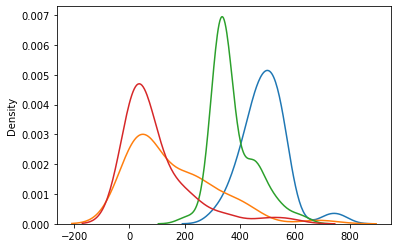

In [ ]:
import seaborn as sns
for i in range(X.shape[1]):
    sns.kdeplot(X[:,i])

In [ ]:
# Try out different combos of normalizers and clfs
from sklearn import preprocessing
normalizers = [preprocessing.Normalizer().fit(X), preprocessing.StandardScaler().fit(X), preprocessing.MinMaxScaler().fit(X)]
clfs = [SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(max_depth=2, random_state=0)]

for normalizer in normalizers:
  for clf in clfs:
    scores = []
    cv = KFold(n_splits=50, random_state=42, shuffle=True)
    X_curr = normalizer.transform(X)
    for train_index, test_index in cv.split(X_curr):
      X_train, X_test, y_train, y_test = X_curr[train_index], X_curr[test_index], Y[train_index], Y[test_index]
      clf.fit(X_train, y_train)
      scores.append(clf.score(X_test, y_test))
    print(f"Mean accuracy for model {str(clf)} with normalizer {str(normalizer)} is {str(np.mean(scores))}")

Mean accuracy for model SVC(kernel='linear') with normalizer Normalizer() is 0.92
Mean accuracy for model SVC(kernel='poly') with normalizer Normalizer() is 0.98
Mean accuracy for model SVC() with normalizer Normalizer() is 0.94
Mean accuracy for model KNeighborsClassifier(n_neighbors=3) with normalizer Normalizer() is 0.96
Mean accuracy for model RandomForestClassifier(max_depth=2, random_state=0) with normalizer Normalizer() is 1.0
Mean accuracy for model SVC(kernel='linear') with normalizer StandardScaler() is 0.96
Mean accuracy for model SVC(kernel='poly') with normalizer StandardScaler() is 0.76
Mean accuracy for model SVC() with normalizer StandardScaler() is 0.94
Mean accuracy for model KNeighborsClassifier(n_neighbors=3) with normalizer StandardScaler() is 0.9
Mean accuracy for model RandomForestClassifier(max_depth=2, random_state=0) with normalizer StandardScaler() is 0.92
Mean accuracy for model SVC(kernel='linear') with normalizer MinMaxScaler() is 0.9
Mean accuracy for mod

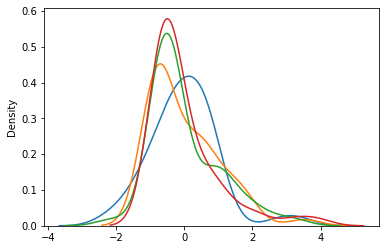

In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler().fit(X)
X_stdScalar = normalizer.transform(X)

import seaborn as sns
for i in range(X_stdScalar.shape[1]):
    sns.kdeplot(X_stdScalar[:,i])

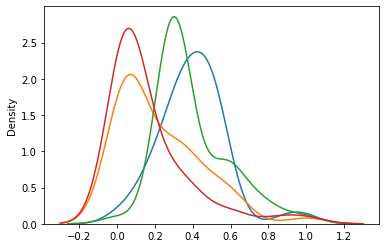

In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler().fit(X)
X_minmaxScalar = normalizer.transform(X)

import seaborn as sns
for i in range(X_minmaxScalar.shape[1]):
    sns.kdeplot(X_minmaxScalar[:,i])

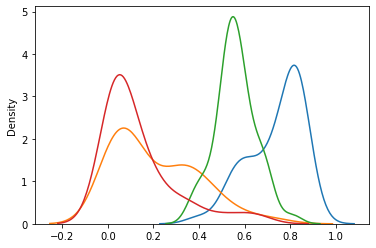

In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X)
X = normalizer.transform(X)

import seaborn as sns
for i in range(X.shape[1]):
    sns.kdeplot(X[:,i])

## Setting up the variables to run the classifier
### No need to make any changes here

In [ ]:
scores = []
cv = KFold(n_splits=50, random_state=42, shuffle=True)

## Assignment Question 3:
### Try different classifiers (at least kNN, SVM, Random Forest)
Tried:) I commented out everything except for the one that worked the best. So far normalizer with random forest works the best.

## Assignment Question 4:
### (a) Plot test accuracy for SVM w.r.t. varying values of C (1e-8 to 1e8, step size of 1000)
### (b) Record test accuracy for SVM for three kernels (Linear, Poly, and RBF)
### (c) Try to briefly reason and explain performance
### (d) Explain the rationale behind calculating all features that you ended up using

## Keep in mind that for 100% credit you want at least one configuration (algorithm + parameters) that provides above 95% accuracy

In [ ]:
# Answer for 4a: test accuracy for SVM w.r.t. varying values of C (1e-8 to 1e8, step size of 1000)
c_value = []
accuracy = []
for c in range(0, 100000000, 10000): # I changed step size to 10000 since it was taking too long
  print('Current c: %d', c)
  c = c + 1e-8
  c_value.append(c)
  clf = SVC(kernel='poly', C=c)
  scores = []
  cv = KFold(n_splits=50, random_state=42, shuffle=True)
  for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  accuracy.append(np.mean(scores))

[1e-08, 10000.00000001, 20000.00000001, 30000.00000001, 40000.00000001, 50000.00000001, 60000.00000001, 70000.00000001, 80000.00000001, 90000.00000001, 100000.00000001, 110000.00000001, 120000.00000001, 130000.00000001, 140000.00000001, 150000.00000001, 160000.00000001, 170000.00000001, 180000.00000001, 190000.00000001, 200000.00000001, 210000.00000001, 220000.00000001, 230000.00000001, 240000.00000001, 250000.00000001, 260000.00000001, 270000.00000001, 280000.00000001, 290000.00000001, 300000.00000001, 310000.00000001, 320000.00000001, 330000.00000001, 340000.00000001, 350000.00000001, 360000.00000001, 370000.00000001, 380000.00000001, 390000.00000001, 400000.00000001, 410000.00000001, 420000.00000001, 430000.00000001, 440000.00000001, 450000.00000001, 460000.00000001, 470000.00000001, 480000.00000001, 490000.00000001, 500000.00000001, 510000.00000001, 520000.00000001, 530000.00000001, 540000.00000001, 550000.00000001, 560000.00000001, 570000.00000001, 580000.00000001, 590000.00000001

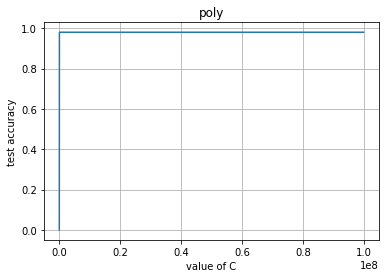

In [ ]:
fig, ax = plt.subplots()
print(c_value, accuracy)
ax.plot(c_value, accuracy)

ax.set(ylabel='test accuracy', xlabel='value of C', title='poly')
ax.grid()

fig.savefig("4a_poly.png")
plt.show()

###Graph for reference
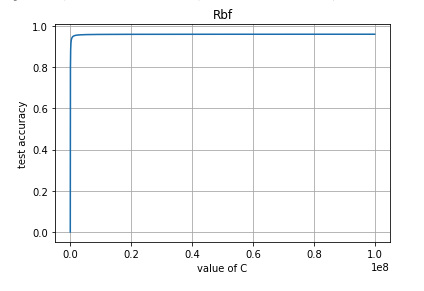
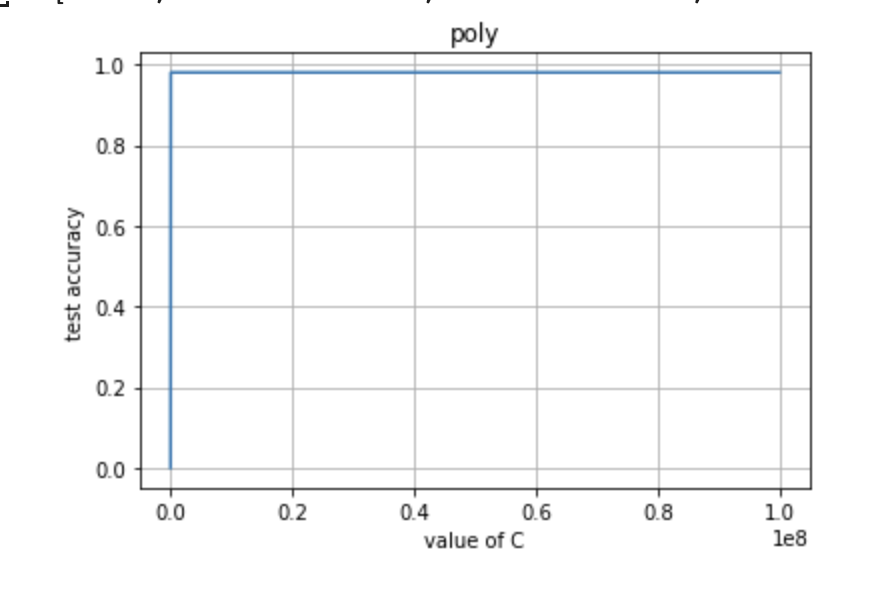
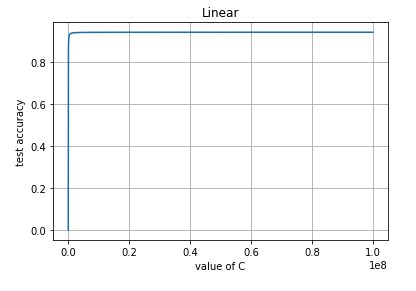

####Here we can observe that poly works the best among the three kernels. This happens probably because poly kernel can create better curve so it can group and seperate the data points better.

####For all three kenerls (linear, poly, and rbf), accuracy increases a lot at the beginning but after the margin becomes too big, it stops matter that much since the model would always give back the same partition.

####Let's take a closer look at the trend for linear kernel.

***I have concluded my observations in 4c ***


Current c: %d 0
Current c: %d 1
Current c: %d 2
Current c: %d 3
Current c: %d 4
Current c: %d 5
Current c: %d 6
Current c: %d 7
Current c: %d 8
Current c: %d 9
Current c: %d 10
Current c: %d 11
Current c: %d 12
Current c: %d 13
Current c: %d 14
Current c: %d 15
Current c: %d 16
Current c: %d 17
Current c: %d 18
Current c: %d 19
Current c: %d 20
Current c: %d 21
Current c: %d 22
Current c: %d 23
Current c: %d 24
Current c: %d 25
Current c: %d 26
Current c: %d 27
Current c: %d 28
Current c: %d 29
Current c: %d 30
Current c: %d 31
Current c: %d 32
Current c: %d 33
Current c: %d 34
Current c: %d 35
Current c: %d 36
Current c: %d 37
Current c: %d 38
Current c: %d 39
Current c: %d 40
Current c: %d 41
Current c: %d 42
Current c: %d 43
Current c: %d 44
Current c: %d 45
Current c: %d 46
Current c: %d 47
Current c: %d 48
Current c: %d 49
Current c: %d 50
Current c: %d 51
Current c: %d 52
Current c: %d 53
Current c: %d 54
Current c: %d 55
Current c: %d 56
Current c: %d 57
Current c: %d 58
Current

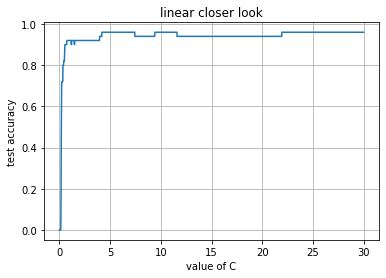

In [ ]:
# A closer look
c_value = []
accuracy = []
for c in range(0, 3000):
  print('Current c: %d', c)
  c = c*0.01 + 1e-8
  c_value.append(c)
  clf = SVC(kernel='linear', C=c)
  scores = []
  cv = KFold(n_splits=50, random_state=42, shuffle=True)
  for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  accuracy.append(np.mean(scores))

fig, ax = plt.subplots()
print(c_value, accuracy)
ax.plot(c_value, accuracy)

ax.set(ylabel='test accuracy', xlabel='value of C', title='linear closer look')
ax.grid()

fig.savefig("4a_closer.png")
plt.show()

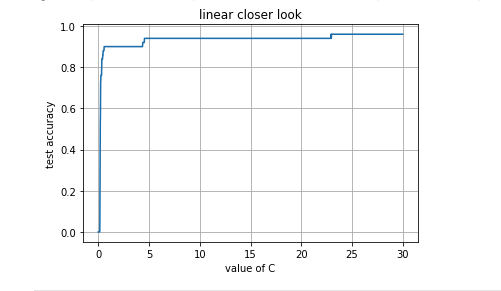

In [ ]:
# Answer for 4b: test accuracy for SVM for three kernels (Linear, Poly, and RBF)
kernelList = ["linear", "poly", "rbf"]
for kernel in kernelList:
  clf = SVC(kernel=kernel)
  scores = []
  cv = KFold(n_splits=50, random_state=42, shuffle=True)
  for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  print(f"Mean accuracy for SVM with {kernel} kernel is {str(np.mean(scores))}")

Mean accuracy for SVM with linear kernel is 0.92
Mean accuracy for SVM with poly kernel is 0.98
Mean accuracy for SVM with rbf kernel is 0.94


### (4b) For one particular run, the mean accuracy for different kernels are: (with default c value)
####Mean accuracy for SVM with linear kernel is 0.9
####Mean accuracy for SVM with poly kernel is 0.96
####Mean accuracy for SVM with rbf kernel is 0.92

**Best performance so far: Normalizer with random forest** \\
So I commented out the other models and only left random forest here

In [ ]:
#SVM for three kernels (Linear, Poly, and RBF)
#clf = SVC(kernel='linear')
#clf = SVC(kernel='poly')
#clf = SVC(kernel='rbf')

#clf = KNeighborsClassifier(n_neighbors=3)
clf = RandomForestClassifier(max_depth=2, random_state=0)

## Calculating model accuracy
### No need to make any changes here

In [ ]:
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print("Mean accuracy:" + str(np.mean(scores)))

Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Test Index:  [13]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49]
Test Index:  [39]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Test Index:  [30]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49]
Test Index:  [45]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Test Index:  [17]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 2

**For one particular run, mean accuracy was 97%**

##Answer for 4c:


###I experimented with different normalization method and chose normalizer with norm l2 from sklearn.processing and random forest. During a few run, the average accuracy is around 97%.
\\
###Rationale:
####Random forest is a tree-based model. That is, it relies on partition so probably there's not much to do with the normalizer method. For this particular purpose (identify ASD), it's crutial to find a threshold between autism vs non-autism users so that's why random forest works pretty well here. For random forest, we're always working with a subset of data. So the model is not likely to be overtrained.

####Ragarding why Normalizer works better than the other two normalizers (StandardScalar and MinMaxScalar), from previous graphs, we can see that Normalizer makes the features more spread out, so it would be eaiser for random forest to do partition.
\\
###Some other observation:
####In 4a, we plot out SVM wrt different C values. For all the kernels, accuracy increase for small C value. When the margin reaches a certain point, the accuracy remains the same. This happens probably because with large margin/confidence level, SVM always finds the same partition since it's impossible to find a parition with huge margin.


## Answer for 4d:


```
# Feature1: the variance of x and y cord
feature1 = np.std(X_cord) + np.std(Y_cord)
fv.append(feature1)

# Feature2: the difference between current cord and prev
if i == 0:
  feature2 = 0
else:
  feature2 = abs((np.median(np.diff([X_cord, X_prev_cord], axis=0))
                         + np.median(np.diff([Y_cord, Y_prev_cord], axis=0))))
fv.append(feature2)
```

####From the video, I have observed that the eye gaze data of autism users tend to be more spread out, so I pick the standard deviation as the first feature. I calculated it as the sum of the std of X coordinates and Y coordinates.

####I have also noticed that eye gaze of autism users appear to move around atypically, where non-autism eye gaze points tend to focus more on the main object in the frame, so I picked the second feature as how the eye gaze coordinates shift between frame to frame (whether the user can focus on the main object). I calculated the difference between each coordinate and previous coordinate, and then took the mean value of it.

####Overall, these two features work pretty well (>95% accuracy).


## Looking at decision boundaries and spread of data
### This is for exploration and will not be graded

In [ ]:
#Give index of features that you are interested in looking at
sub_features = [0,2]

Mean Accuracy :  0.9702970297029703
This accuracy number is not used for evaluating your solution as it only looks at a subset of features.


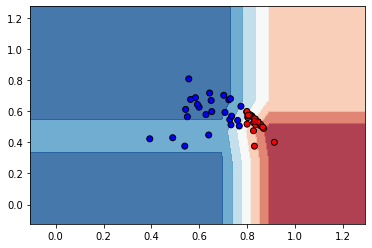

In [ ]:
h = .2  # step size in the mesh
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
h = .2  # step size in the mesh
x_min, x_max = X[:, sub_features[0]].min() - .5, X[:, sub_features[0]].max() + .5
y_min, y_max = X[:, sub_features[1]].min() - .5, X[:, sub_features[1]].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points
clf.fit(X_train[:,sub_features],y_train)
scores.append(clf.score(X_test[:,sub_features], y_test))
print('Mean Accuracy : ',str(np.mean(scores)))
print('This accuracy number is not used for evaluating your solution as it only looks at a subset of features.')
if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
fig = plt.figure()

Z = Z.reshape(xx.shape)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.scatter(X_train[:, sub_features[0]], X_train[:, sub_features[1]], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, sub_features[0]], X_test[:, sub_features[1]], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')


plt.show()